In [49]:
import pandas as pd
import numpy as np

Question 1 . Import and store the data in a data frame. 

In [50]:
dataurl = 'http://www.stat.ufl.edu/~winner/data/airq402.dat'

df = pd.read_csv(dataurl,sep ='\s+')
df.columns = ['City1','City2','Avg_Fare','Distance','Avg_wkly_passngrs','mkt_leadn_air','mkt_share_leading_arl','avg_fare_leading_arl','low_price_arl','mkt_share_low_rpice','price_low_price_arl']
df

,City1,City2,Avg_Fare,Distance,Avg_wkly_passngrs,mkt_leadn_air,mkt_share_leading_arl,avg_fare_leading_arl,low_price_arl,mkt_share_low_rpice,price_low_price_arl
0,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
1,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
2,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
3,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
4,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
5,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
6,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
7,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
8,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78
9,ABQ,ATL,212.49,1269,198.80,DL,68.39,226.79,AA,11.91,200.93


Question 2 : Remove the outliers from the data 

In [52]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_final = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_final

df = remove_outlier(df,'Avg_Fare')
df = remove_outlier(df,'Distance')
df = remove_outlier(df,'Avg_wkly_passngrs')
df = remove_outlier(df,'mkt_share_leading_arl')
df = remove_outlier(df,'avg_fare_leading_arl')
df = remove_outlier(df,'mkt_share_low_rpice')
df = remove_outlier(df,'price_low_price_arl')

df

,City1,City2,Avg_Fare,Distance,Avg_wkly_passngrs,mkt_leadn_air,mkt_share_leading_arl,avg_fare_leading_arl,low_price_arl,mkt_share_low_rpice,price_low_price_arl
0,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
1,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
2,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
3,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
4,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
5,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
6,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
7,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
8,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78
9,ABQ,ATL,212.49,1269,198.80,DL,68.39,226.79,AA,11.91,200.93


In [ ]:
Question3  : Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable and split the table

In [53]:
x = df[["Distance","Avg_wkly_passngrs","mkt_share_leading_arl","avg_fare_leading_arl",
         "mkt_share_low_rpice","price_low_price_arl"]]
y= df[["Avg_Fare"]]

In [54]:
df.corr() < 0.1

,Avg_Fare,Distance,Avg_wkly_passngrs,mkt_share_leading_arl,avg_fare_leading_arl,mkt_share_low_rpice,price_low_price_arl
Avg_Fare,False,False,True,True,False,True,False
Distance,False,False,True,True,False,True,False
Avg_wkly_passngrs,True,True,False,True,True,True,True
mkt_share_leading_arl,True,True,True,False,True,False,True
avg_fare_leading_arl,False,False,True,True,False,True,False
mkt_share_low_rpice,True,True,True,False,True,False,True
price_low_price_arl,False,False,True,True,False,True,False


In [55]:
df.drop(['Avg_wkly_passngrs','mkt_share_leading_arl','mkt_share_low_rpice'], axis=1 ,inplace = True)

In [56]:
df.head(5)

,City1,City2,Avg_Fare,Distance,mkt_leadn_air,avg_fare_leading_arl,low_price_arl,price_low_price_arl
0,CAK,MCO,122.47,860,FL,123.09,DL,118.94
1,ALB,ATL,214.42,852,DL,223.98,CO,167.12
2,ALB,BWI,69.40,288,WN,68.86,WN,68.86
3,ALB,ORD,158.13,723,UA,161.36,WN,145.42
4,ALB,FLL,135.17,1204,WN,137.97,DL,127.69


C:\Users\pn9220\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


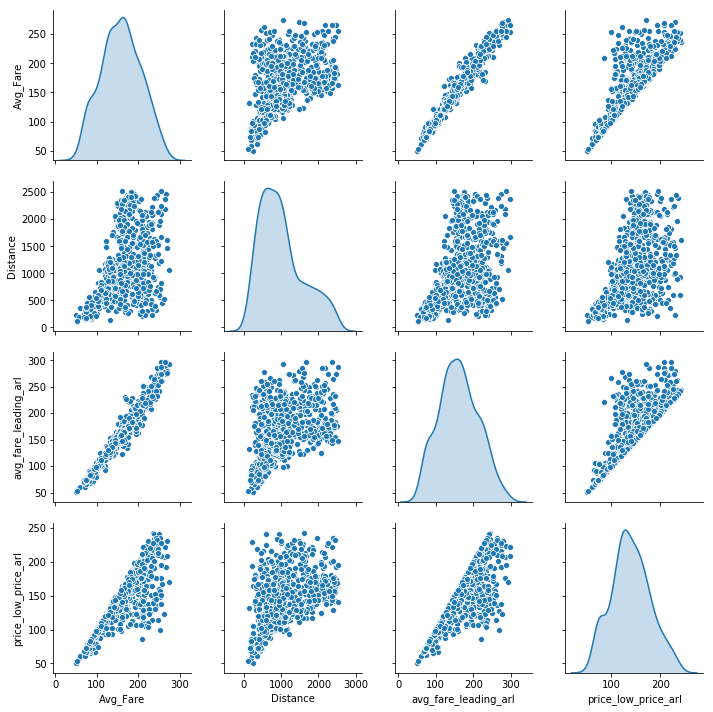

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.pairplot( df , diag_kind='kde')

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
x = df[["Distance", "avg_fare_leading_arl","price_low_price_arl"]]
y = df[["Avg_Fare"]]

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                    random_state=7)


In [61]:
multilinregmodel = LinearRegression()

In [62]:
multilinregmodel.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
multilinregmodel.intercept_

array([5.31427366])

In [64]:
multilinregmodel.coef_

array([[0.00161067, 0.7818012 , 0.187536  ]])